# Zomato Data Analysis Project

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

# Reading data in to csv

In [12]:
df = pd.read_csv(r"E:\Zomato data .csv")

# *Data Analysis Begins*

In [14]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [20]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [22]:
df.shape

(148, 7)

In [24]:
df.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

In [63]:
def handel_rate(value):
    value = str(value).split("/")
    value = value[0]
    return float(value)
df["rate"] = df["rate"].apply(handel_rate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [66]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [72]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [94]:
df["listed_in(type)"].value_counts()

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

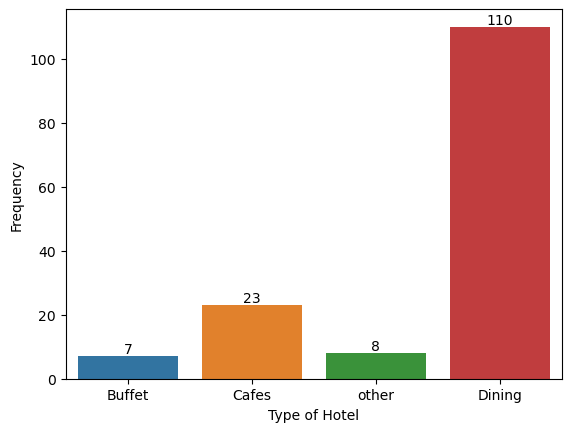

In [96]:
ax = sns.countplot(x="listed_in(type)",data=df)
for i in ax.containers:
    ax.bar_label(i)
ax.set_xlabel("Type of Hotel")
ax.set_ylabel("Frequency")
plt.show()


# Most of the people eat at dinning categorey resturant

In [101]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


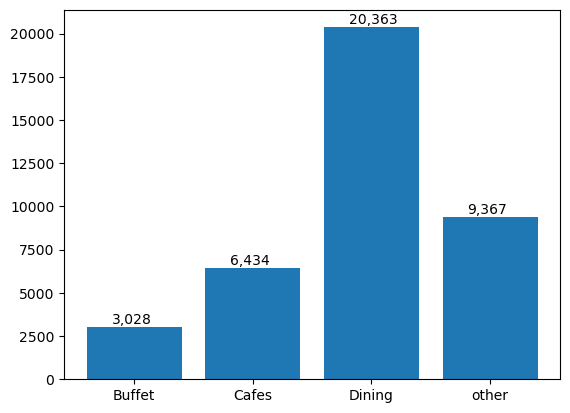

In [151]:
data = df.groupby("listed_in(type)")["votes"].sum()
plt.bar(data.index,data.values)
for i,v in enumerate(data):
    label = format(int(v),",")
    plt.annotate(label,xy=(i-0.19,v+1000-200-100-100-300-100),color="black")
plt.show()

(0.0, 21229.75)

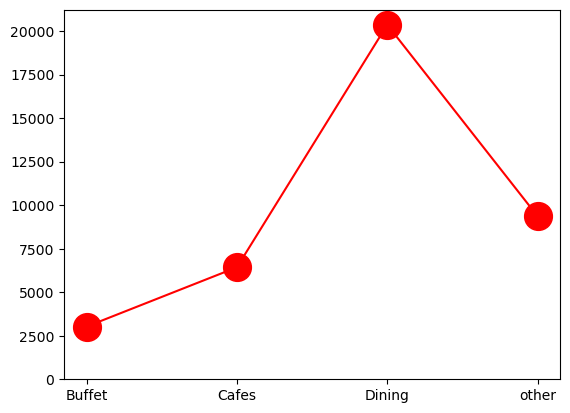

In [171]:
plt.plot(data.index,data.values,color="red",marker="o",markersize=20)
plt.ylim(0,)

# Dining restourant has max votes

([<matplotlib.axis.XTick at 0x1ae54e37cd0>,
 [Text(2.6, 0, '2.6'),
  Text(3.0, 0, '3.0'),
  Text(3.4, 0, '3.4'),
  Text(3.8, 0, '3.8'),
  Text(4.199999999999999, 0, '4.2'),
  Text(4.6, 0, '4.6')])

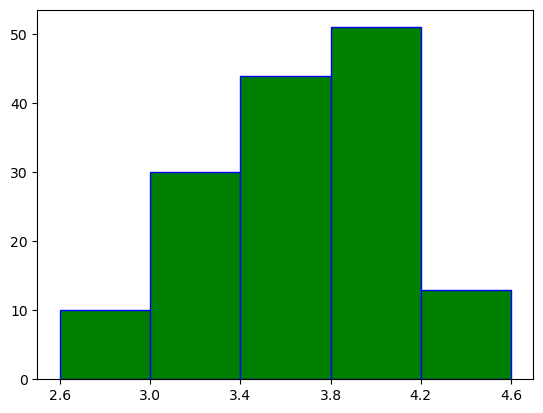

In [186]:
ax = plt.hist(df["rate"],bins=5,color="green",edgecolor="blue")
plt.xticks(ax[1])

# Most of the customer gave rating in between 3.4 to 4.2

In [191]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


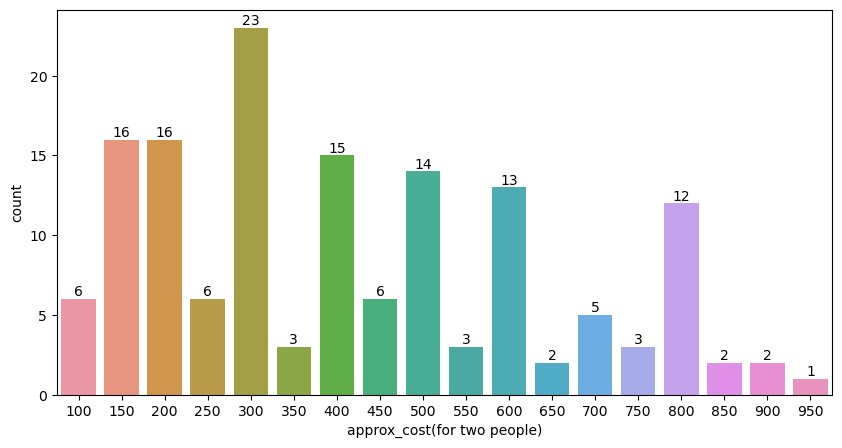

In [199]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x=df["approx_cost(for two people)"])
for i in ax.containers:
    ax.bar_label(i)

# Most of the couple spend 300,150,200,400,500 on food

In [202]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

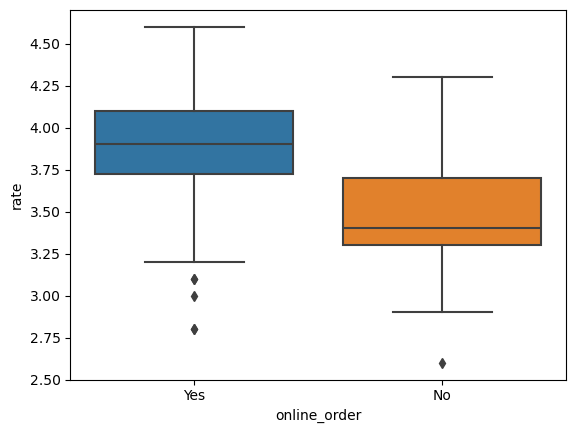

In [272]:
sns.boxplot(x="online_order",y="rate",data=df)

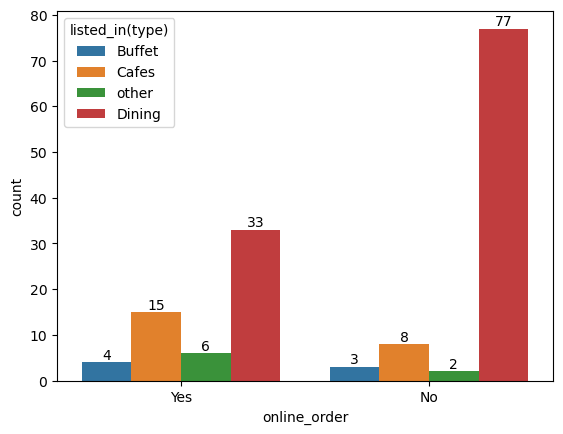

In [334]:
ax = sns.countplot(x="online_order",data=df,hue="listed_in(type)")
for i in ax.containers:
    ax.bar_label(i)

# In both online and offline orders couples order food from dining type restourant

# *Conclusion*

# Dining restourant have more rating and both online and offline orders but offline orders are high then online also dining restourant have max votes

# Cafes recieve mostly online orders

# Most of the couple spend 300,150,200,400,500 on food